In [28]:
from importlib import reload
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from src.visualization import draw_graph_after_failure, draw_graph_with_node_highlighted
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack

In [3]:
G = load_data_with_attributes()

Graph loaded: 4941 nodes, 6594 edges


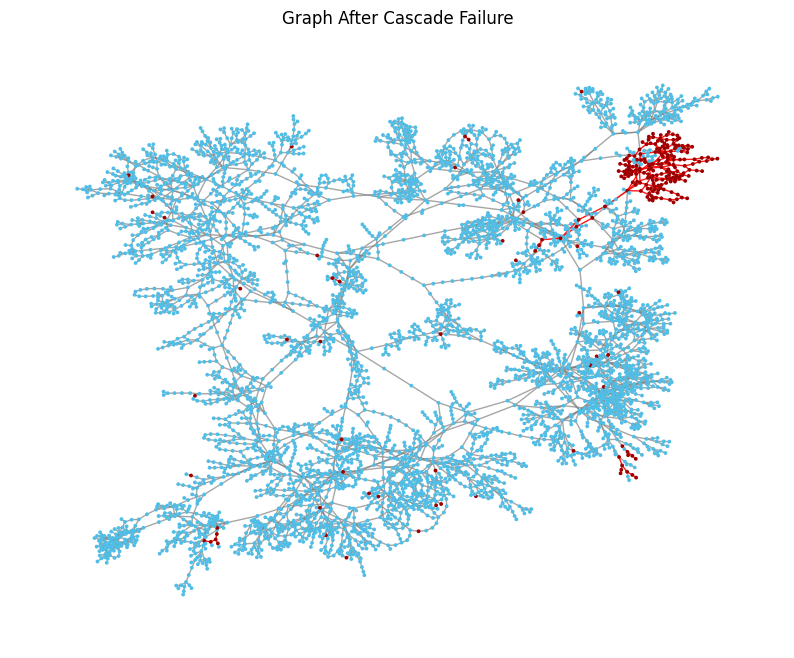

Number of failed nodes: 244
Number of intact nodes: 4697


In [158]:
attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=50)
G_after_failure = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))

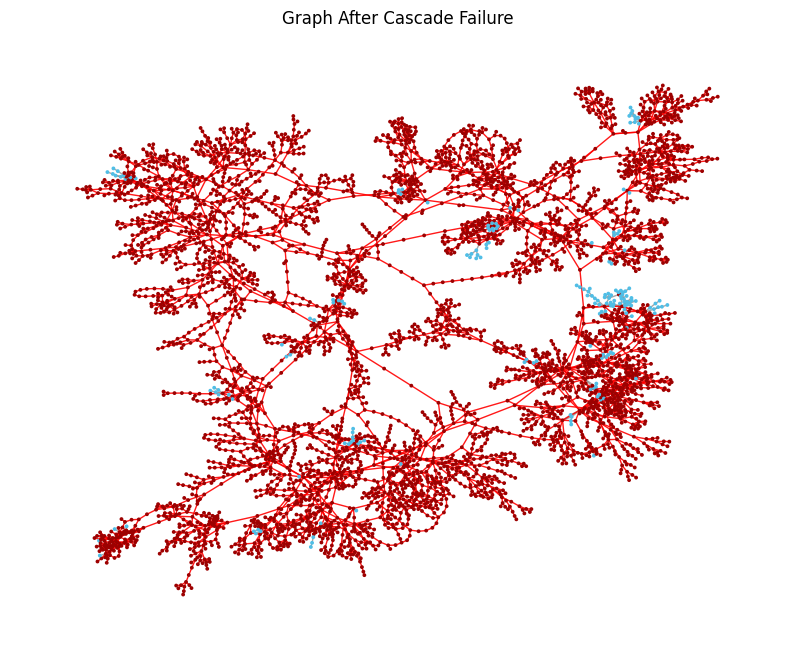

Number of failed nodes: 4760
Number of intact nodes: 181
Total nodes: 4941


In [157]:
attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=50)
G_after_failure = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))
print("Total nodes:", G_after_failure.number_of_nodes())

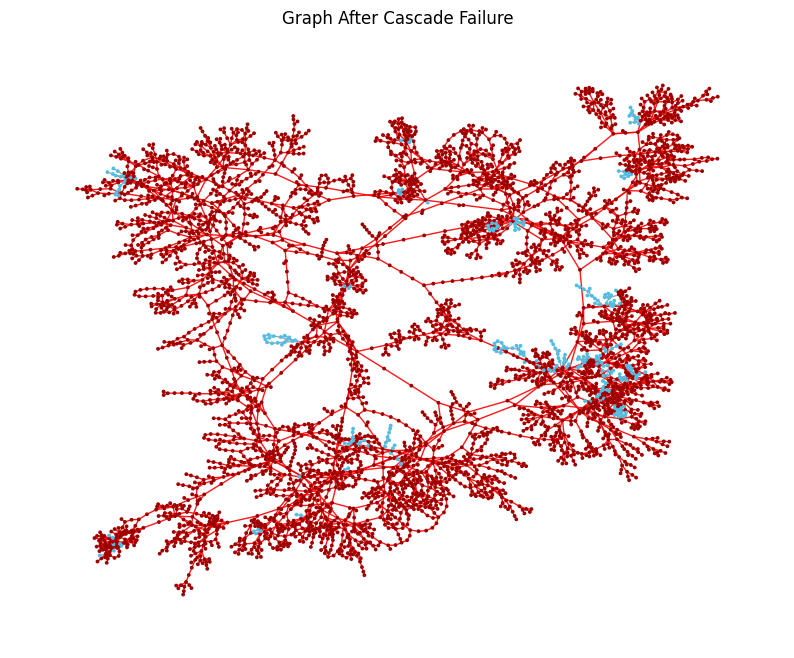

Number of failed nodes: 4683
Number of intact nodes: 258
Total nodes: 4941


In [159]:
attacked_nodes = high_degree_node_attack(G, number_of_nodes=50)
G_after_failure = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))
print("Total nodes:", G_after_failure.number_of_nodes())

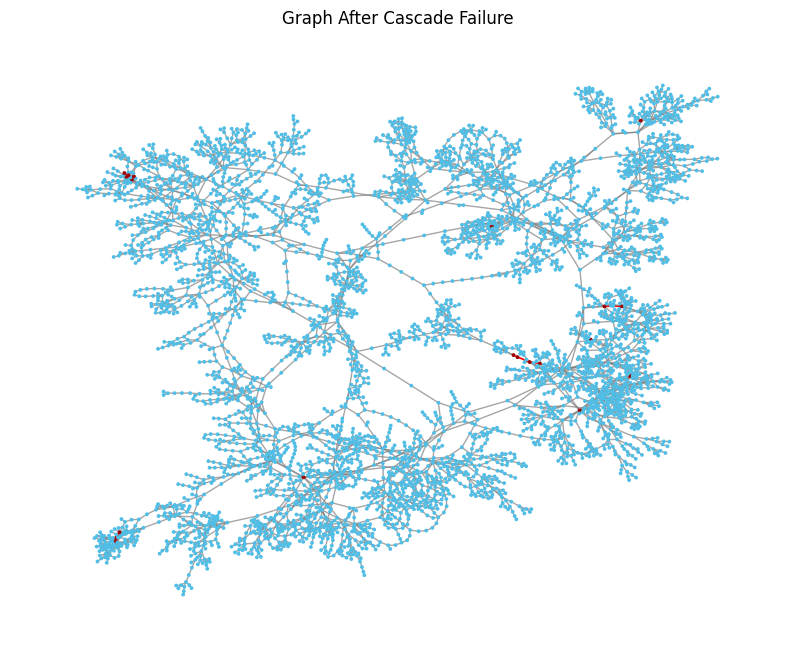

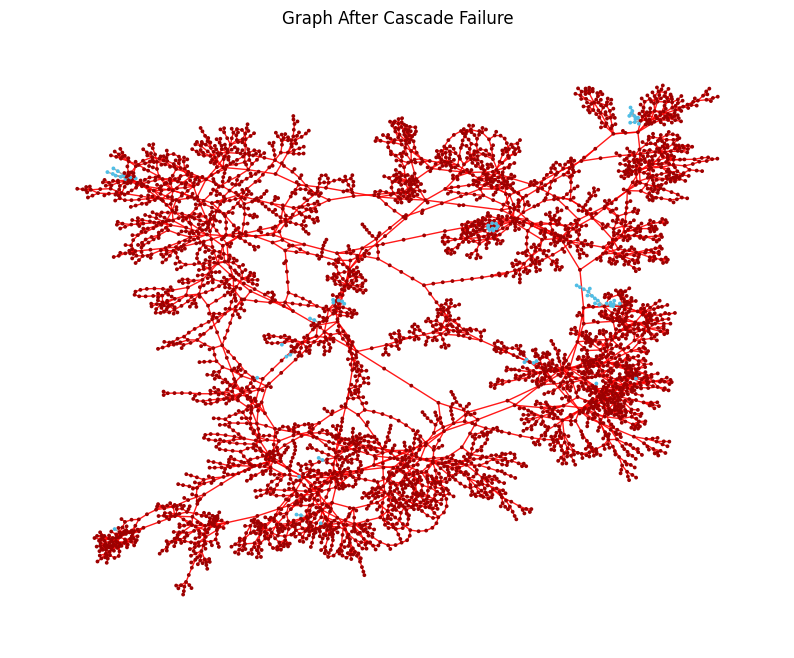

Critical node whose failure causes significant cascade: 8


In [26]:
attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=13)
G_after_failure = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
failed_nodes_47 = [n for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]]

attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=14)
G_after_failure = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
failed_nodes_48 = [n for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]]

node = None
for n in failed_nodes_48:
    if n not in failed_nodes_47:
        node=n
        break
print("Critical node whose failure causes significant cascade:", node)

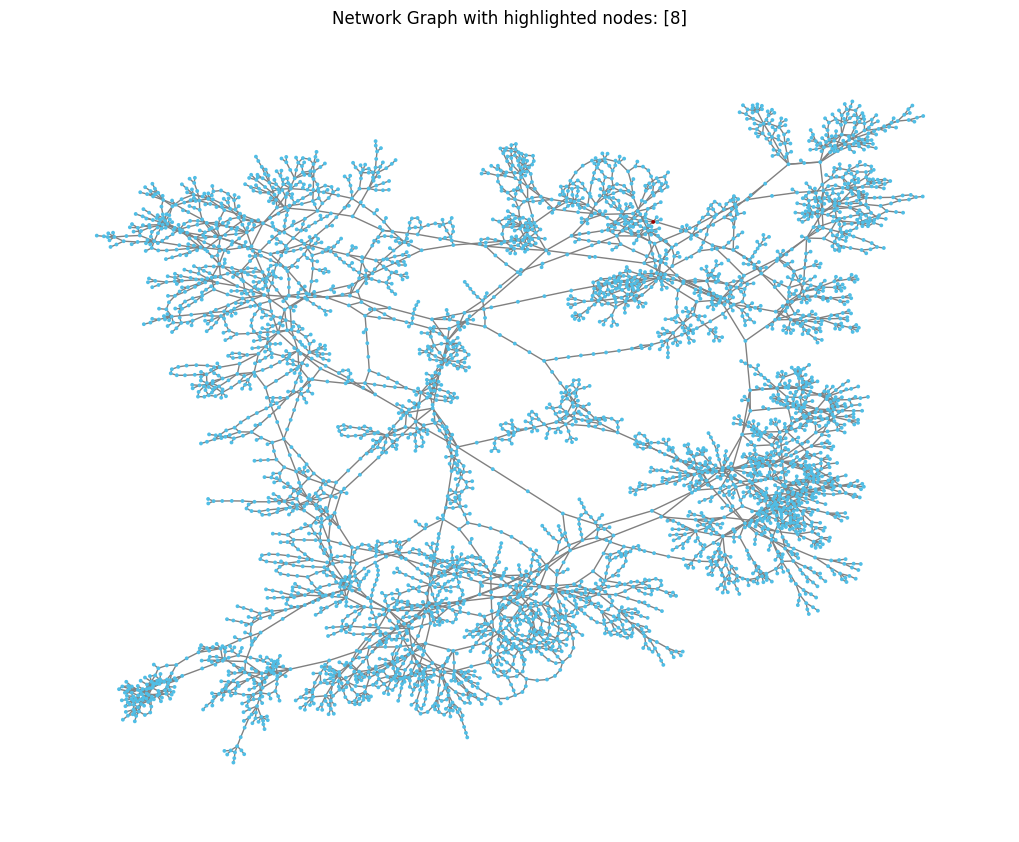

In [29]:
draw_graph_with_node_highlighted(G, [8])

Load of node 8: 20.885424887303657
Capacity of node 8: 36.60728621977991
Degree of node 8: 3


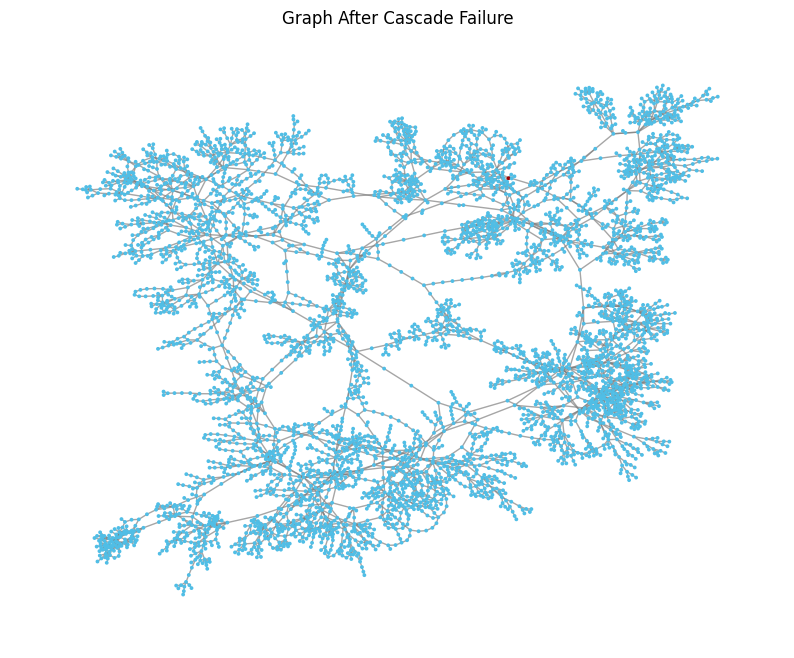

In [25]:
attacked_nodes = [8]
degree_of_node_8 = G.degree(8)
capacity_of_node_8 = G.nodes[8]['capacity']
load_of_node_8 = G.nodes[8]['load']
print("Load of node 8:", load_of_node_8)
print("Capacity of node 8:", capacity_of_node_8)
print("Degree of node 8:", degree_of_node_8)
G_after_failure = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
